This notebook is used for exploratory data analysis, make sure you use the cleaned dataset from the "data_cleaning" folder in the repo.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
sns.set(rc = {'figure.figsize':(15,8)})

In [ ]:
# Used Functions
def add_trace(fig, df, var, row, col, mc ='#B40426'):

  return fig.add_trace(
      go.Box(y=df[var],
      name=var, marker_color=mc),
      row=row, col=col
  )

def add_trace_outcome(fig, df, var, row, col, mc ='#B40426'):

  return fig.add_trace(
      go.Box(y=df[var],
      name=var, marker_color=mc),
      row=row, col=col, color = 'Outcome'
  )


def percentage_plot(var1, var2):
  cross_tab_prop = pd.crosstab(index=df[var1],
                              columns=df[var2],
                              normalize="index")
  cross_tab_prop.plot(kind='bar', 
                      stacked=True, 
                      colormap='coolwarm', 
                      figsize=(10, 6))

  plt.legend(loc="upper left", ncol=2)
  plt.xlabel(var1)
  plt.ylabel("Percentage")

  cross_tab = pd.crosstab(index=df[var1],
                          columns=df[var2])
  plt.show()
  display(cross_tab_prop)

In [ ]:
df = pd.read_csv('/content/Heart Diseases Clean Grouped Last.csv')
df_corr = pd.read_csv('/content/Heart Diseases Clean Normal.csv')
display(df.head(3))

,Age,Sex,Chest Pain Type,Resting Blood Pressure,Cholestrol,Fasting Blood Pressure > 120mg/dl,Rest ECG,Maximum Heart Rate,Exercise Induced Angina,Exercise Induced ST Depression,Slope,Number of Major Vessels,Thalassemia,Outcome
0,63.0,Male,Typical Angina,145,233,True,Abnormal,150,No,2.3,Downsloping,0,Fixed Defect,No Heart Disease
1,67.0,Male,Asymptomatic,160,286,False,Abnormal,108,Yes,1.5,Flat,3,Normal,Heart Disease
2,67.0,Male,Asymptomatic,120,229,False,Abnormal,129,Yes,2.6,Flat,2,Reversable Defect,Heart Disease


In [ ]:
df['Number of Major Vessels'] = df['Number of Major Vessels'].astype(str)
df['Fasting Blood Pressure > 120mg/dl'] = df['Fasting Blood Pressure > 120mg/dl'].astype(str)
df['Thalassemia'] = df['Thalassemia'].astype(str)

# Filter Numerical and Categorical columns
df_num = df.select_dtypes('number')
df_cat = df.select_dtypes(['object'])

print("The categorical columns are: \n", df_cat.columns, '\n')
print("The numerical columns are: \n", df_num.columns)

The categorical columns are: 
 Index(['Sex', 'Chest Pain Type', 'Fasting Blood Pressure > 120mg/dl',
       'Rest ECG', 'Exercise Induced Angina', 'Slope',
       'Number of Major Vessels', 'Thalassemia', 'Outcome'],
      dtype='object') 

The numerical columns are: 
 Index(['Age', 'Resting Blood Pressure', 'Cholestrol', 'Maximum Heart Rate',
       'Exercise Induced ST Depression'],
      dtype='object')


# *Exploratory Data Analysis*

## *Correlation*

###Heat Map

**Size of Correlation**|**Interpretation**
:-----:|:-----:
.90 to 1.00 (−.90 to −1.00)|Very high positive (negative) correlation
.70 to .90 (−.70 to −.90)|High positive (negative) correlation
.50 to .70 (−.50 to −.70)|Moderate positive (negative) correlation
.30 to .50 (−.30 to −.50)|Low positive (negative) correlation
.00 to .30 (.00 to −.30)|negligible correlation

###Pearson correlation

Both pearson and spearman correlations are similar, so we can consider the correlation between the numerical and rank variables viable.

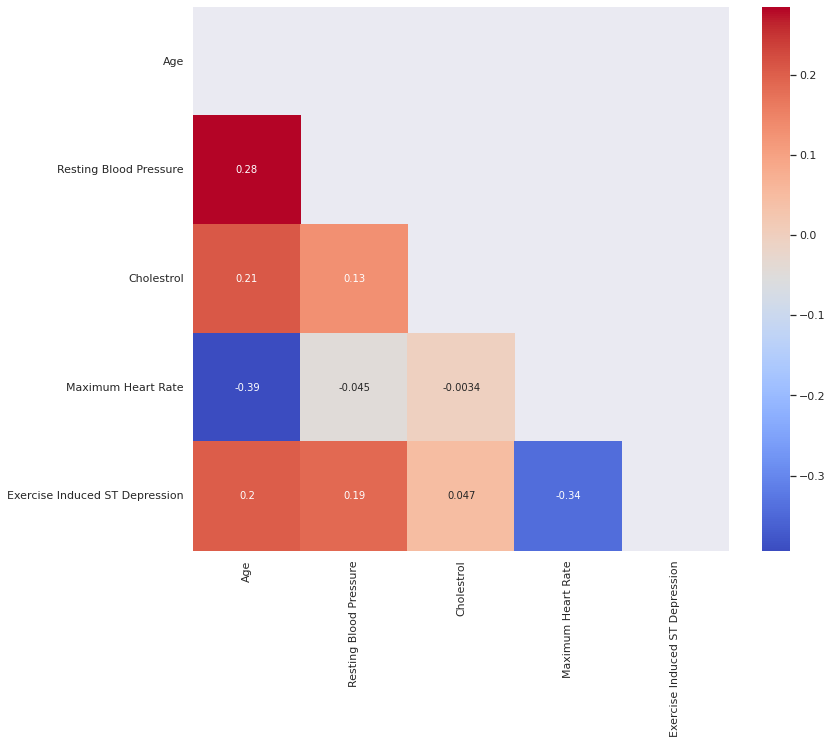

In [ ]:
plt.figure(figsize = (12,10))
corr = df_num.corr()
# Using only the lower half of the heatmap to avoid redundancy
matrix = np.triu(corr)
sns.heatmap(corr, annot = True, cmap = 'coolwarm', mask = matrix)

We can see that most of the correlations between numerical variables using pearsons are negligbile, or low correlations. However, we will explore them further for non-parametric relationships.

In [ ]:
c = df.loc[:, df.columns != 'outcome'].corr()
s = c.unstack()
so = pd.DataFrame(s.sort_values(kind="quicksort"))
display(so)

0
Age                            Maximum Heart Rate             -0.393806
Maximum Heart Rate             Age                            -0.393806
                               Exercise Induced ST Depression -0.343085
Exercise Induced ST Depression Maximum Heart Rate             -0.343085
Maximum Heart Rate             Resting Blood Pressure         -0.045351
Resting Blood Pressure         Maximum Heart Rate             -0.045351
Maximum Heart Rate             Cholestrol                     -0.003432
Cholestrol                     Maximum Heart Rate             -0.003432
Exercise Induced ST Depression Cholestrol                      0.046564
Cholestrol                     Exercise Induced ST Depression  0.046564
Resting Blood Pressure         Cholestrol                      0.130120
Cholestrol                     Resting Blood Pressure          0.130120
Exercise Induced ST Depression Resting Blood Pressure          0.189171
Resting Blood Pressure         Exercise Induced ST Depression  0.189171
Exercise Induced ST Depression Age                             0.203805
Age                            Exercise Induced ST Depression  0.203805
Cholestrol                     Age                             0.208950
Age                            Cholestrol                      0.208950
                               Resting Blood Pressure          0.284946
Resting Blood Pressure         Age                             0.284946
Age                            Age                             1.000000
Cholestrol                     Cholestrol                      1.000000
Resting Blood Pressure         Resting Blood Pressure          1.000000
Maximum Heart Rate             Maximum Heart Rate              1.000000
Exercise Induced ST Depression Exercise Induced ST Depression  1.000000

###Spearman correlation

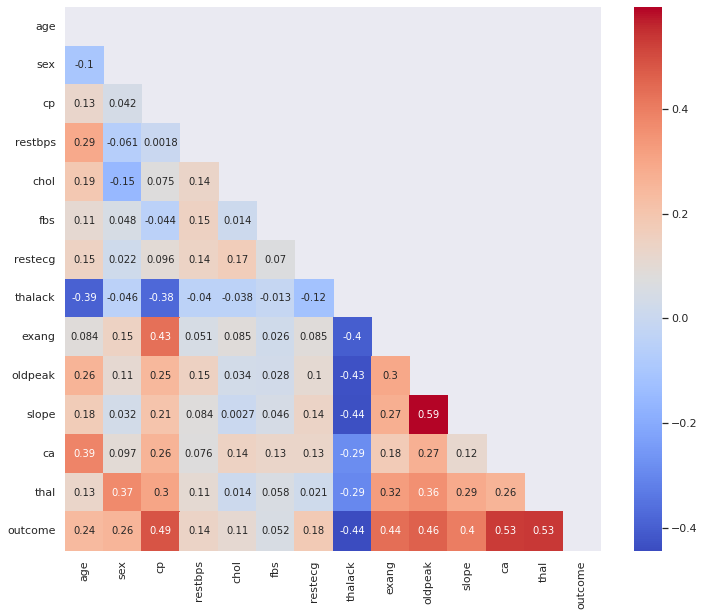

In [ ]:
plt.figure(figsize = (12,10))
corr = df_corr.corr(method = 'spearman')
matrix = np.triu(corr)
sns.heatmap(corr, annot = True, cmap = 'coolwarm', mask = matrix)

In [ ]:
c = df_corr.corr(method = 'spearman')
s = c.unstack()
so = pd.DataFrame(s.sort_values(kind="quicksort"))
display(so)

0
thalack outcome -0.443944
outcome thalack -0.443944
slope   thalack -0.435766
thalack slope   -0.435766
        oldpeak -0.431510
...                   ...
restbps restbps  1.000000
cp      cp       1.000000
sex     sex      1.000000
thal    thal     1.000000
outcome outcome  1.000000

[196 rows x 1 columns]

We should observe the relationship between the outcome and other variables directly (categorical vs categorical and numerical vs numerical), after assessing other relationships.

**Variable 1**|**Variable 2**|**Correlation**|**Identification**
:-----:|:-----:|:-----:|:-----:
slope|outcome|0.40030234220771915|Low positive correlation
exang|outcome|0.43525477533153456|Low positive correlation
oldpeak|outcome|0.46303189285050217|Low positive correlation
cp|outcome|0.4869334788835544|Low positive correlation
ca|outcome|0.5309391744043568|Moderate positive correlation
thal|outcome|0.53489118339737|Moderate positive correlation
thalack|outcome|-0.4439444229427587|Low negative correlation

## Numerical Variables Exploration

In [ ]:
# Statistical Exploration
df_num.describe()

,Age,Resting Blood Pressure,Cholestrol,Maximum Heart Rate,Exercise Induced ST Depression
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,131.689769,246.693069,149.607261,1.039604
std,9.038662,17.599748,51.776918,22.875003,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,48.000000,120.000000,211.000000,133.500000,0.000000
50%,56.000000,130.000000,241.000000,153.000000,0.800000
75%,61.000000,140.000000,275.000000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


###Boxplots

In [ ]:
# Visual Statistical Exploration using Boxplot
vars = df_num.columns
                    
fig = make_subplots(rows=3, cols=2, 
                     subplot_titles=(vars))

add_trace(fig, df, vars[0], 1, 1)
add_trace(fig, df, vars[1], 1, 2)
add_trace(fig, df, vars[2], 2, 1)
add_trace(fig, df, vars[3], 2, 2)
add_trace(fig, df, vars[4], 3, 1)

fig.update_layout(height=700, width=900, title = "Spread of Numerical Data in the Heart Disease Dataset")

###Pairplot

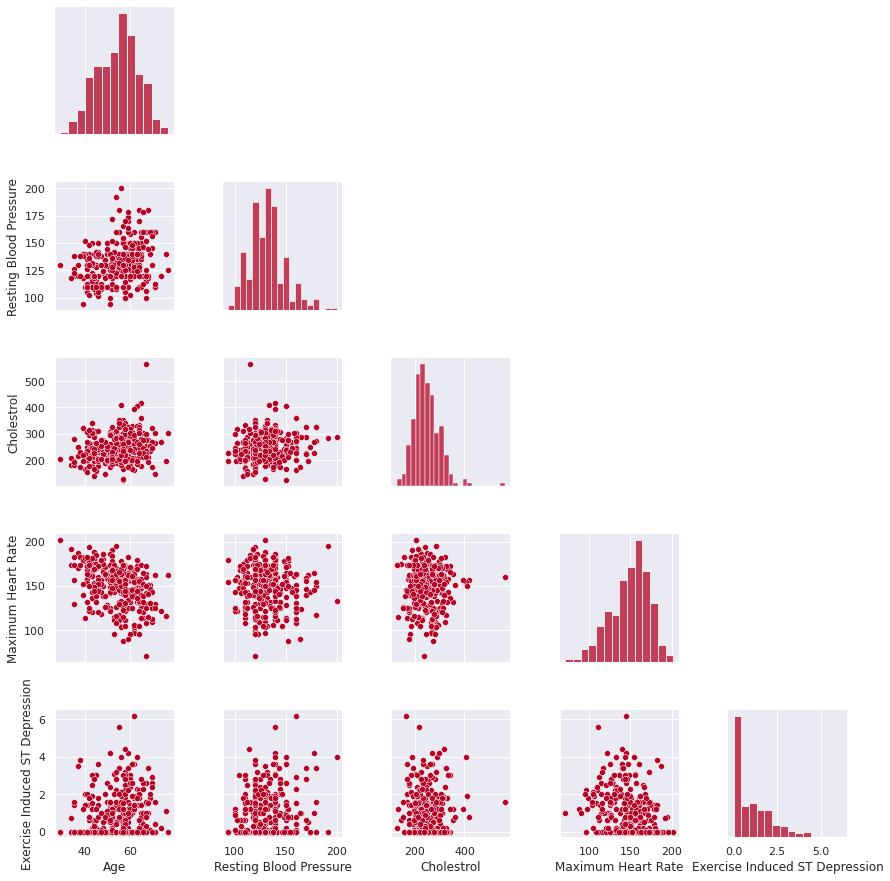

In [ ]:
pair_grid = df[['Age', 'Resting Blood Pressure', 'Cholestrol', 'Maximum Heart Rate',
       'Exercise Induced ST Depression']]

g = sns.PairGrid(pair_grid, diag_sharey=False, corner=True)
g.map_offdiag(sns.scatterplot, color = '#B40426');
g.map_diag(sns.histplot, color = '#B40426');

###Age vs other variables

[None]

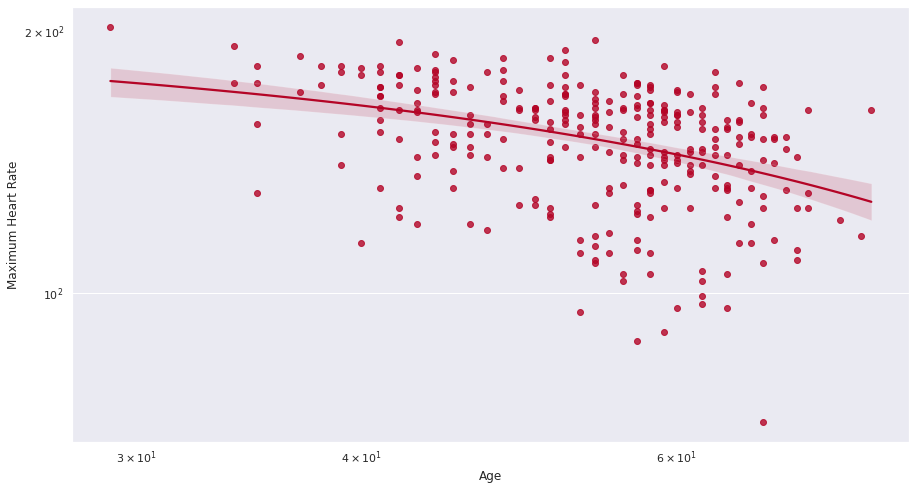

In [ ]:
plot = sns.regplot(data = df, x = 'Age', y = 'Maximum Heart Rate', color = '#B40426')
plot.set(xscale = 'log')
plot.set(yscale = 'log')

We can observe through the graph that there is a relationship between thalack and age, where as the age increases thalack decreases (maximum heart rate achieved). We should also assess the impact of the maximum heart rate achieved on the outcome.

[None]

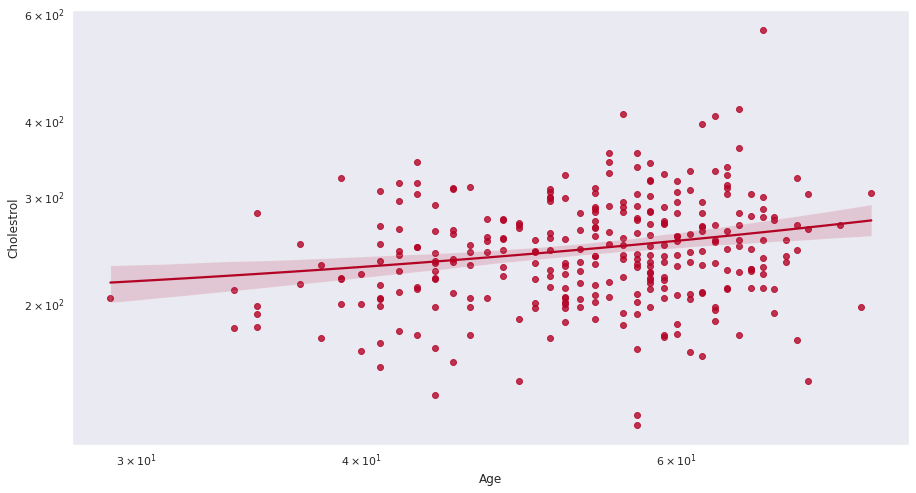

In [ ]:
plot = sns.regplot(data = df, x = 'Age', y = 'Cholestrol', color = '#B40426')
plot.set(xscale = 'log')
plot.set(yscale = 'log')

We can observe a mild positive correlation between the age and cholesterol levels, where as the age increases the cholesterol level slightly increases, we should also observe the impact of cholesterol levels on the outcome.

[None]

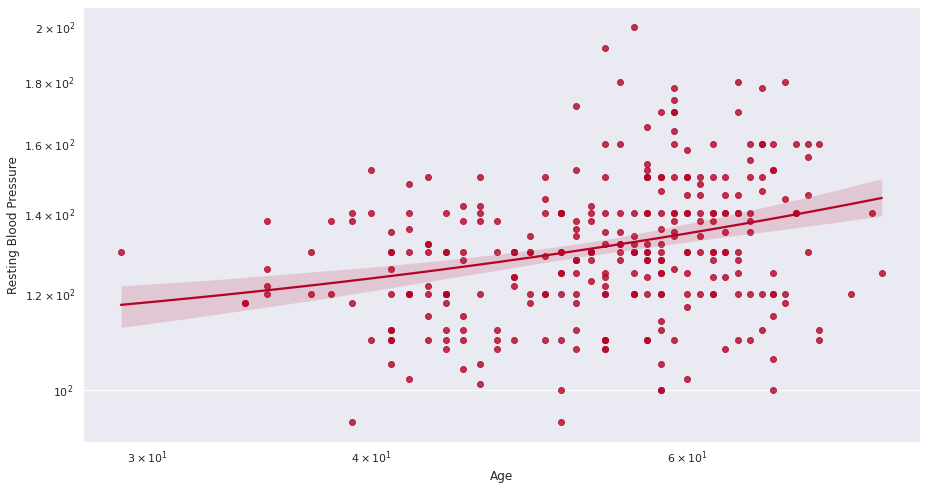

In [ ]:
plot = sns.regplot(data = df, x = 'Age', y = 'Resting Blood Pressure', color = '#B40426')
plot.set(xscale = 'log')
plot.set(yscale = 'log')

We can observe that there is a small correlation between the age and the resting blood pressure, which is also obvious. We should assess the impact of resting blood pressure on the outcome.

There isn't any other significant non-linear relationship in the data.

## Categorical Variables Exploration

###Thalassemia and Heart Disease

Since thalassemia and outcome are correlated (0.54), we should investigate the impact of thalassemia on the outcome

In [ ]:
px.histogram(df, x="Thalassemia", color="Outcome", barmode = 'group', color_discrete_map = {'Heart Disease':'#B40426', 'No Heart Disease':'#3E51C5'})

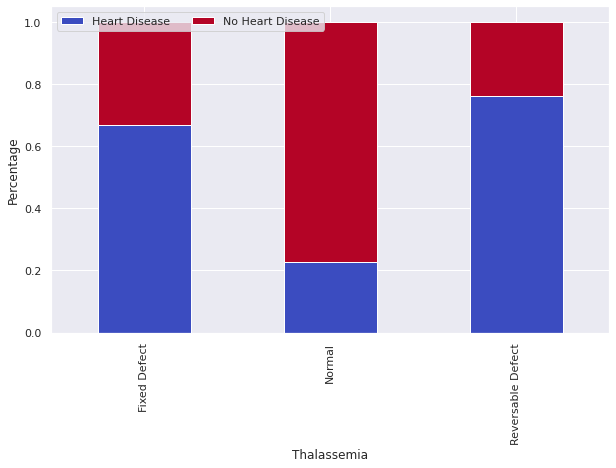

Outcome,Heart Disease,No Heart Disease
Thalassemia,,
Fixed Defect,0.666667,0.333333
Normal,0.226190,0.773810
Reversable Defect,0.760684,0.239316


In [ ]:
percentage_plot("Thalassemia", "Outcome")

We can see that most of the people with 'reversable defect' thalassemia have a heart disease (76%), on the other hand most people with 'normal' thalassemia do not have a heart disease (77%). Therefore, we can conclude that 'reversable defect thalassemia' has a high impact on heart diseases and should be factor to consider.

As for 'fixed defect' thalassemia, the percentage bar plot shows that it has a high impact, however the sample size of the data can be considered insufficient compared to 'normal' and 'reversable defect' thalassemia.

Ask client about the impact of thalassemia on heart diseases, in addition to the meaning of reversable defect and fixed defect.

### Sex and Heart Disease

In [ ]:
# (df_cat['Sex'].value_counts() / len(df)) * 100
px.histogram(df, x="Sex", color="Outcome", barmode = 'group', color_discrete_map = {'Heart Disease':'#B40426', 'No Heart Disease':'#3E51C5'})

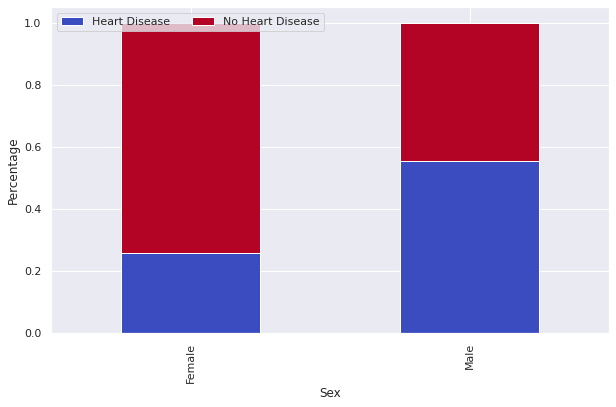

Outcome,Heart Disease,No Heart Disease
Sex,,
Female,0.257732,0.742268
Male,0.553398,0.446602


In [ ]:
percentage_plot('Sex', 'Outcome')

Males have a higher tendency to have a heart disease, since 55% of males in the dataset have heart diseases. On the other hand, 25% of females in the dataset have heart diseases. This supports the following research "Men generally develop CVD at a younger age and have a higher propensity of developing coronary heart disease (CHD) than women." [1]

### Chest Pain and Heart Disease

In [ ]:
px.histogram(df, x='Chest Pain Type', color='Outcome', barmode = 'group', color_discrete_map = {'Heart Disease':'#B40426', 'No Heart Disease':'#3E51C5'})

In [ ]:
px.histogram(df[df['Sex'] == 'Female'], x='Chest Pain Type', color='Outcome', barmode = 'group', color_discrete_map = {'Heart Disease':'#B40426', 'No Heart Disease':'#3E51C5'})

In [ ]:
px.histogram(df[df['Sex'] == 'Male'], x='Chest Pain Type', color='Outcome', barmode = 'group', color_discrete_map = {'Heart Disease':'#B40426', 'No Heart Disease':'#3E51C5'})

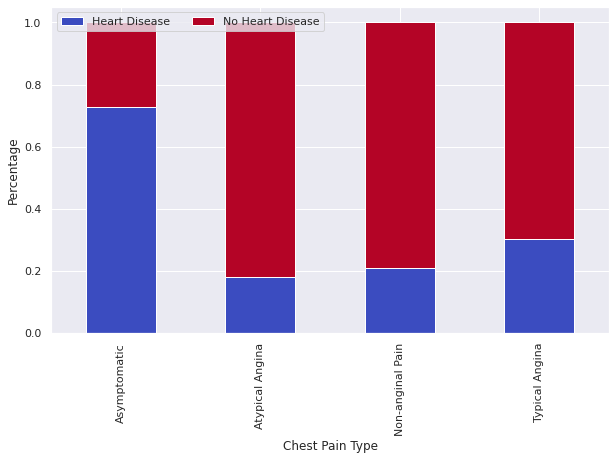

Outcome,Heart Disease,No Heart Disease
Chest Pain Type,,
Asymptomatic,0.729167,0.270833
Atypical Angina,0.180000,0.820000
Non-anginal Pain,0.209302,0.790698
Typical Angina,0.304348,0.695652


In [ ]:
percentage_plot('Chest Pain Type', 'Outcome')

Around 72% of patients with asymptomatic chest pain have CHD. This shows that most patients that had heart diseases did not experience chest pain. (Ask client about this).

### Rest ECG and Heart Disease

In [ ]:
px.histogram(df,x='Rest ECG', color ='Outcome', barmode = 'group', color_discrete_map = {'Heart Disease':'#B40426', 'No Heart Disease':'#3E51C5'})

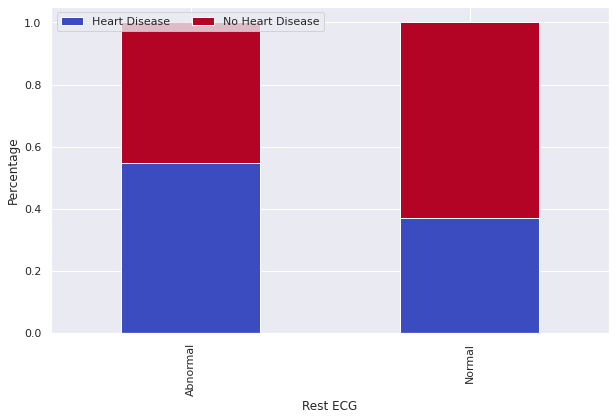

Outcome,Heart Disease,No Heart Disease
Rest ECG,,
Abnormal,0.546053,0.453947
Normal,0.370861,0.629139


In [ ]:
percentage_plot('Rest ECG', 'Outcome')

### Slope and Heart Disease

In [ ]:
px.histogram(df, x='Slope', color='Outcome', barmode = 'group', color_discrete_map = {'Heart Disease':'#B40426', 'No Heart Disease':'#3E51C5'})

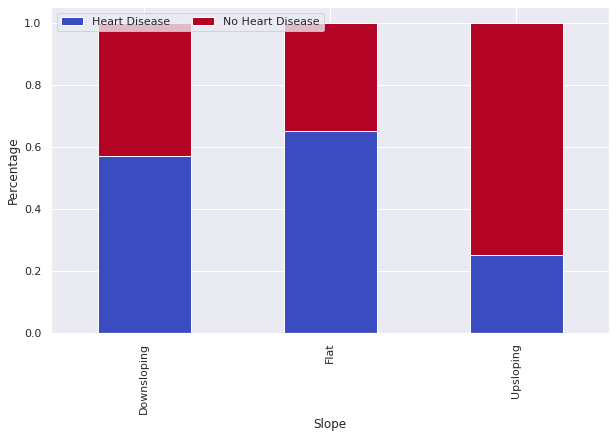

Outcome,Heart Disease,No Heart Disease
Slope,,
Downsloping,0.571429,0.428571
Flat,0.650000,0.350000
Upsloping,0.253521,0.746479


In [ ]:
percentage_plot('Slope', 'Outcome')

### Fasting Blood Pressure and Heart Disease

In [ ]:
px.histogram(df, x='Fasting Blood Pressure > 120mg/dl', color='Outcome', barmode = 'group', color_discrete_map ={'Heart Disease':'#B40426', 'No Heart Disease':'#3E51C5'})

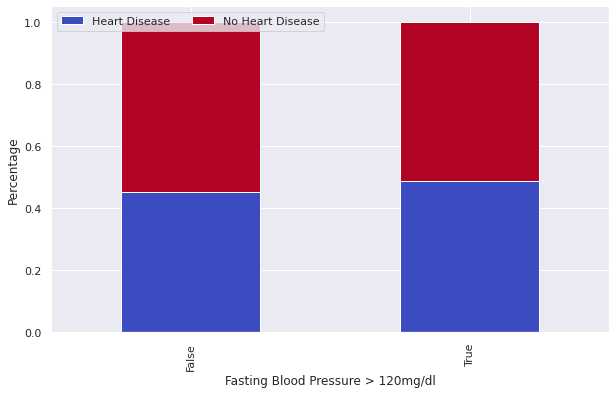

Outcome,Heart Disease,No Heart Disease
Fasting Blood Pressure > 120mg/dl,,
False,0.453488,0.546512
True,0.488889,0.511111


In [ ]:
percentage_plot('Fasting Blood Pressure > 120mg/dl', 'Outcome')

### Exercise Induced Angina and Heart Disease

In [ ]:
px.histogram(df, x='Exercise Induced Angina', color='Outcome', barmode = 'group', color_discrete_map = {'Heart Disease':'#B40426', 'No Heart Disease':'#3E51C5'})

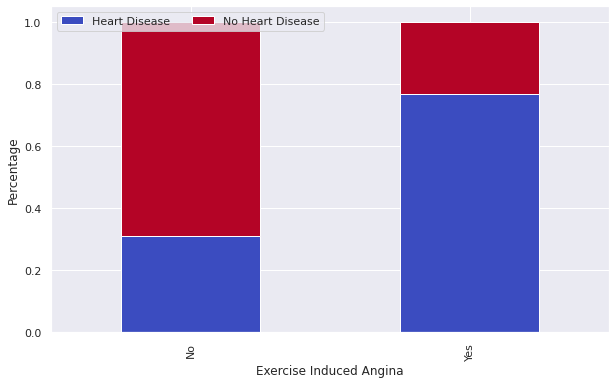

Outcome,Heart Disease,No Heart Disease
Exercise Induced Angina,,
No,0.308824,0.691176
Yes,0.767677,0.232323


In [ ]:
percentage_plot('Exercise Induced Angina', 'Outcome')

Most people with excersize induced angina heave heart diseases (77%). Therefore, excersize induced chest pain should be a factor to consider when dealing with heart diseases.

### Number of Major Vessels and Heart Disease

In [ ]:
px.histogram(df, x='Number of Major Vessels', color = 'Outcome', barmode = 'group', color_discrete_map = {'Heart Disease':'#B40426', 'No Heart Disease':'#3E51C5'})

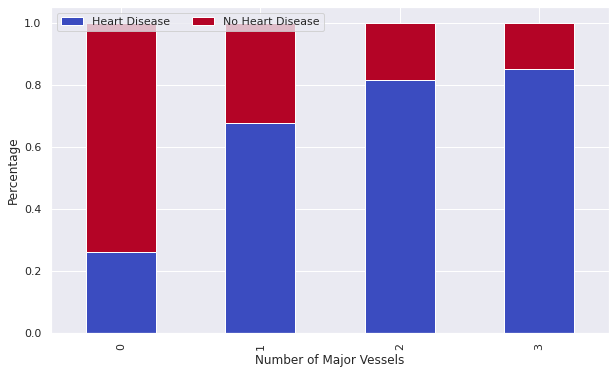

Outcome,Heart Disease,No Heart Disease
Number of Major Vessels,,
0,0.261111,0.738889
1,0.676923,0.323077
2,0.815789,0.184211
3,0.850000,0.150000


In [ ]:
percentage_plot('Number of Major Vessels', 'Outcome')

## Numerical and Categorical Exploration

### Exploring Numerical Variables with the Outcome

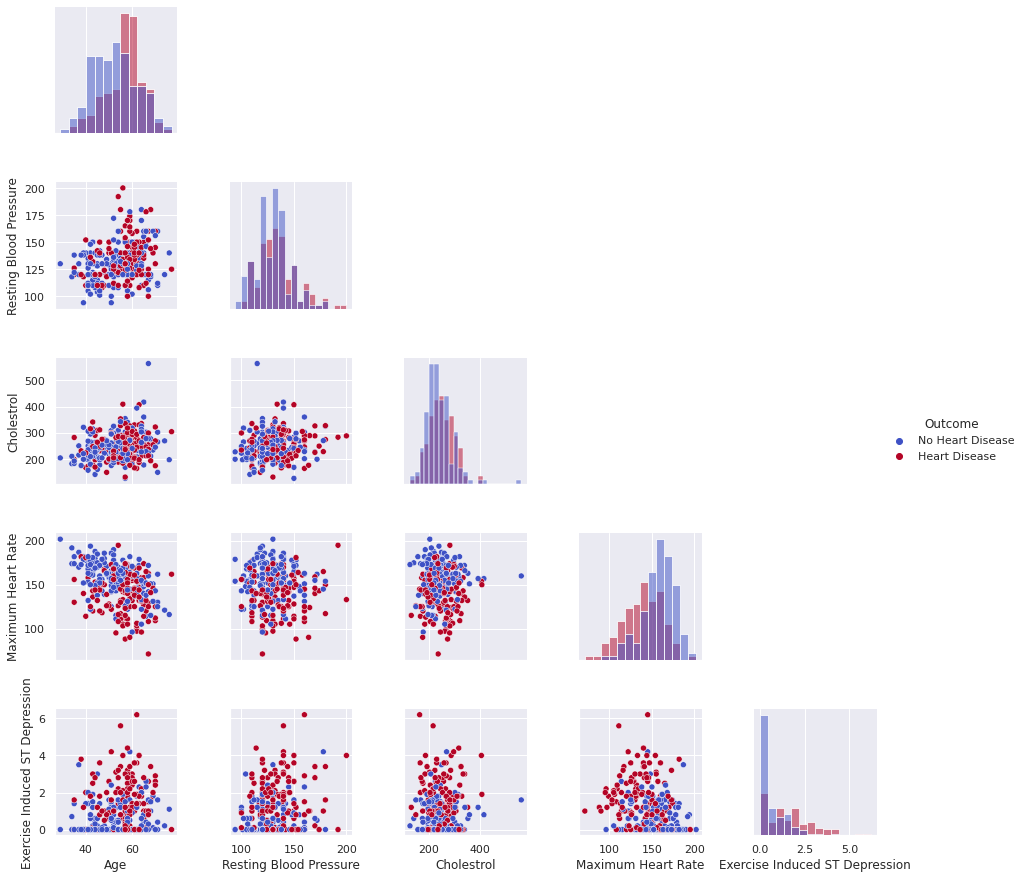

In [ ]:
pair_grid = df[['Age', 'Resting Blood Pressure', 'Cholestrol',
       'Maximum Heart Rate', 'Exercise Induced ST Depression', 'Outcome']]

g = sns.PairGrid(pair_grid, hue = 'Outcome', diag_sharey=False, corner=True)
g.map_offdiag(sns.scatterplot, palette = {'Heart Disease':'#B40426', 'No Heart Disease':'#3E51C5'});
g.map_diag(sns.histplot, palette = {'Heart Disease':'#B40426', 'No Heart Disease':'#3E51C5'});
g.add_legend();

In [ ]:
#Attempt at using plotly.
'''
df['mcolour'] = np.where(
     df['Outcome'] == "Heart Disease" , 
    '#636EFA', 
     np.where(
        df['Outcome'] == 'No Heart Disease', '#EF553B', '#00CC96'
     )
)


fig = px.box(df, x="Outcome", y="Cholestrol")
fig.update_layout(boxmode = "overlay")
fig.show()
'''

###Outcome and Age

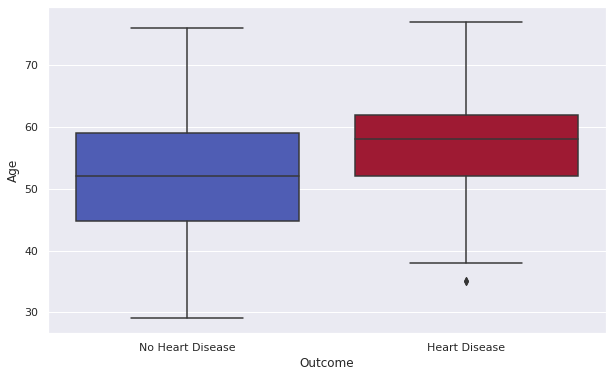

In [ ]:
sns.boxplot(data = df, x = 'Outcome', y = 'Age', palette = {'Heart Disease':'#B40426', 'No Heart Disease':'#3E51C5'})

The mean of the age of heart disease patients is higher.

###Outcome and Cholestrol

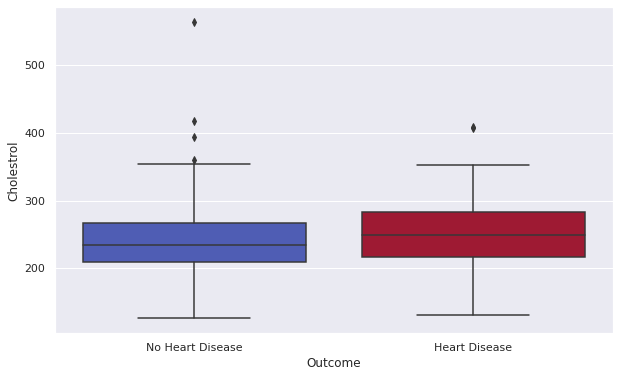

In [ ]:
sns.boxplot(data = df, x = 'Outcome', y = 'Cholestrol', palette = {'Heart Disease':'#B40426', 'No Heart Disease':'#3E51C5'})

The mean cholesterol is slightly higher for heart disease patients.

###Outcome and Resting Blood Pressure

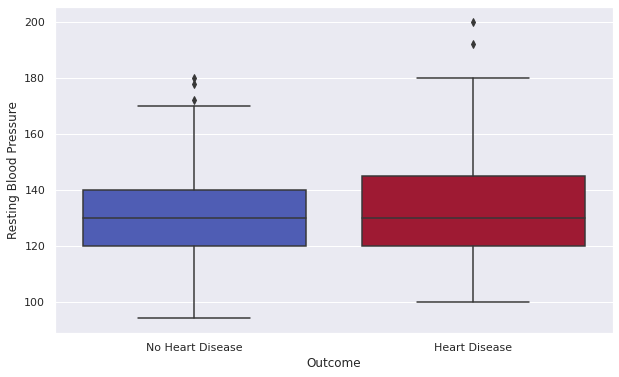

In [ ]:
sns.boxplot(data = df, x = 'Outcome', y = 'Resting Blood Pressure', palette = {'Heart Disease':'#B40426', 'No Heart Disease':'#3E51C5'})

The variance of  the blood pressure for heart disease patients was higher, however the mean is almost the same.
The high variance shows that there is irregularity in blood pressure levels among heart disease patients.

###Outcome and Maximum Heart Rate

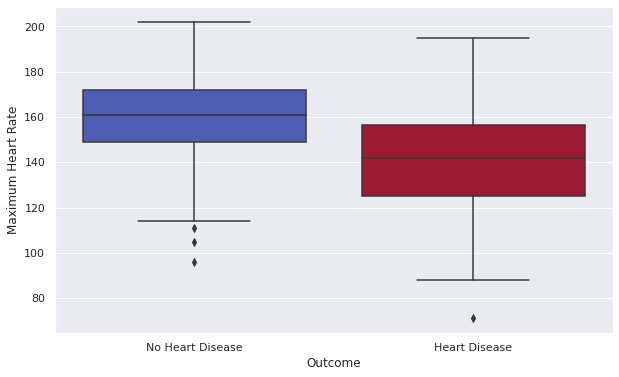

In [ ]:
sns.boxplot(data = df, x = 'Outcome', y = 'Maximum Heart Rate', palette = {'Heart Disease':'#B40426', 'No Heart Disease':'#3E51C5'})

The mean maximum heart rate is lower for heart disease patients, which is also connected to the age, where heart disease patients are older.

###Outcome and Exercise Induced ST Depression

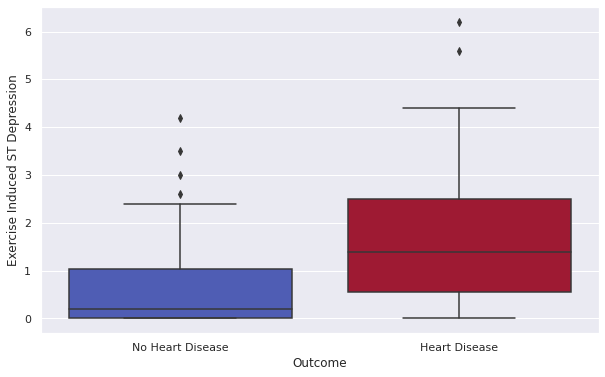

In [ ]:
sns.boxplot(data = df, x = 'Outcome', y = "Exercise Induced ST Depression", palette = {'Heart Disease':'#B40426', 'No Heart Disease':'#3E51C5'})

The mean and variance of excersize induced st depression for heart disease patients is higher.

## *Clustering Analysis*

### *Cholestrol and Maximum Heart Rate*

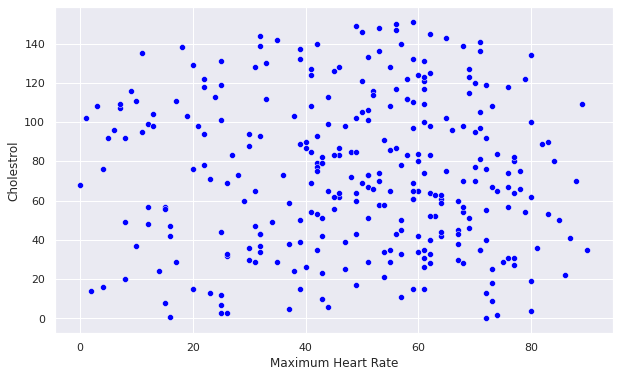

In [ ]:
from sklearn.preprocessing import LabelEncoder
df_new = df.apply(LabelEncoder().fit_transform)

X = df_new.filter(["Cholestrol", "Maximum Heart Rate"], axis = 1)

sns.scatterplot(data = X, y="Cholestrol", x= "Maximum Heart Rate", c = ["blue"])


In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

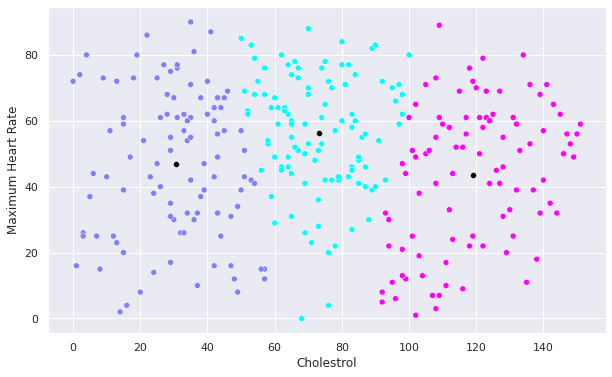

In [ ]:
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1], c= kmeans.labels_, cmap='cool')

sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], c=['black'])

### *Cholestrol and Resting Blood Pressure*

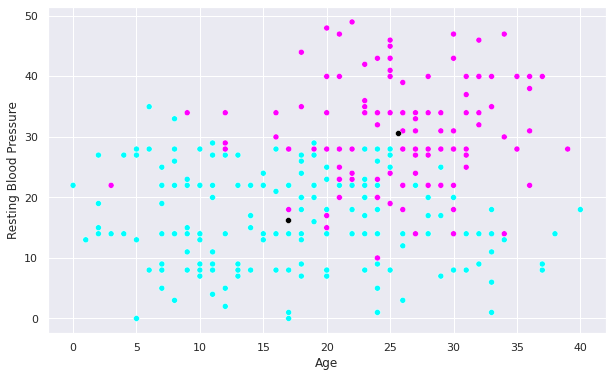

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


X = df_new.filter(['Age', 'Resting Blood Pressure'], axis = 1)

#sns.scatterplot(data = X, x="Cholestrol", y= "Resting Blood Pressure", c = ["blue"])

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1], c= kmeans.labels_, cmap='cool')

sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], c=['black'])

### *Cholestrol and Age*

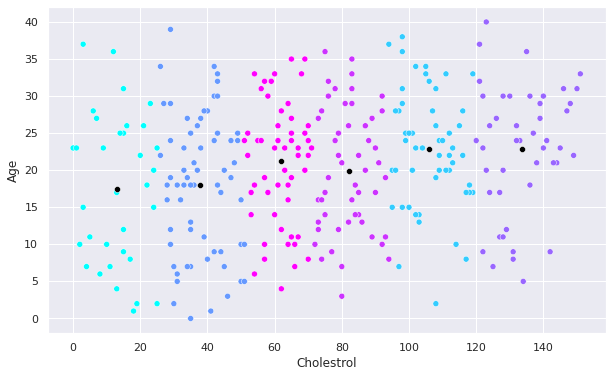

In [ ]:
X = df_new.filter(["Cholestrol", "Age"], axis = 1)

#sns.scatterplot(data = X, y="Cholestrol", x= "Age", c = ["blue"])

kmeans = KMeans(n_clusters=6)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1], c= kmeans.labels_, cmap='cool')

sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], c=['black'])

### *Cholestrol and Exercise Induced ST Depression*

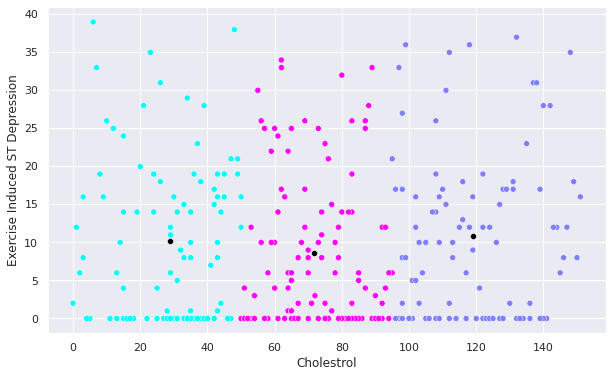

In [ ]:
X = df_new.filter(["Cholestrol", "Exercise Induced ST Depression"], axis = 1)

#sns.scatterplot(data = X, y="Cholestrol", x= "Age", c = ["blue"])

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1], c= kmeans.labels_, cmap='cool')

sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], c=['black'])

### *Resting Blood Pressure and Age*

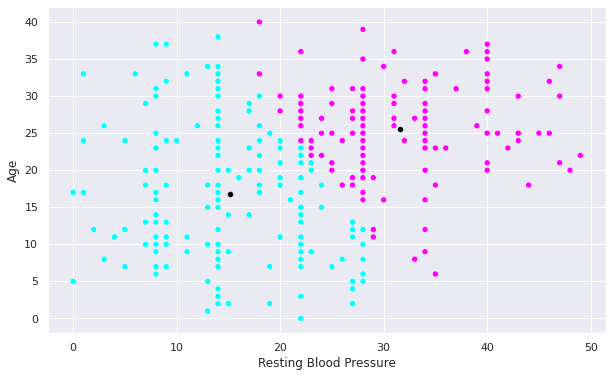

In [ ]:
X = df_new.filter(["Resting Blood Pressure", "Age"], axis = 1)

#sns.scatterplot(data = X, y="Cholestrol", x= "Age", c = ["blue"])

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1], c= kmeans.labels_, cmap='cool')

sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], c=['black'])

### *Resting Blood Pressure and Maximum Heart Rate*

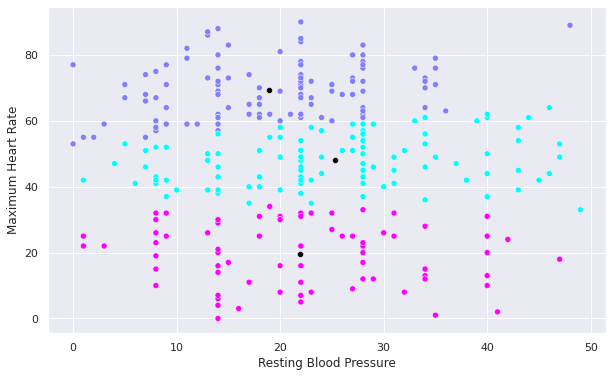

In [ ]:
X = df_new.filter(["Resting Blood Pressure", "Maximum Heart Rate"], axis = 1)

#sns.scatterplot(data = X, y="Cholestrol", x= "Age", c = ["blue"])

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1], c= kmeans.labels_, cmap='cool')

sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], c=['black'])

### *Resting Blood Pressure and Exercise Induced ST Depression*

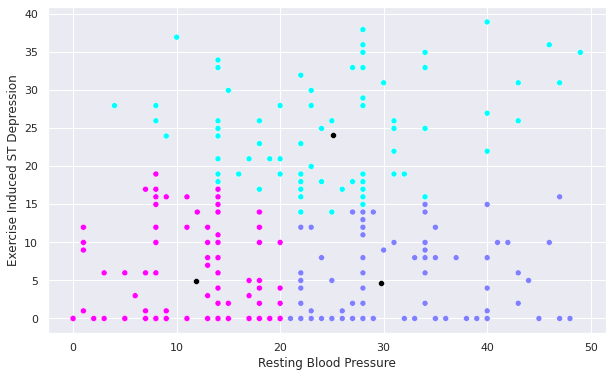

In [ ]:
X = df_new.filter(["Resting Blood Pressure", "Exercise Induced ST Depression"], axis = 1)

#sns.scatterplot(data = X, y="Cholestrol", x= "Age", c = ["blue"])

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1], c= kmeans.labels_, cmap='cool')

sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], c=['black'])

### *Age and Exercise Induced ST Depression*

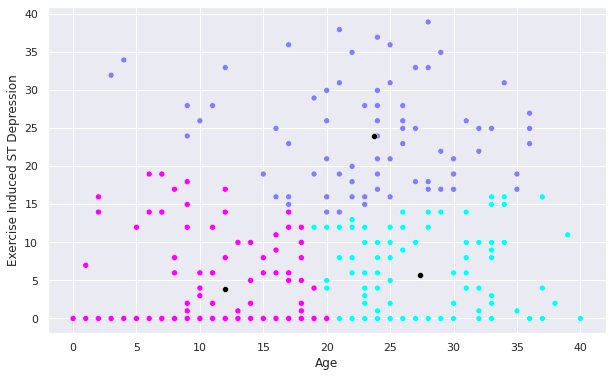

In [ ]:
X = df_new.filter(["Age", "Exercise Induced ST Depression"], axis = 1)

#sns.scatterplot(data = X, y="Cholestrol", x= "Age", c = ["blue"])

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1], c= kmeans.labels_, cmap='cool')

sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], c=['black'])

### *Maxium Heart Rate and Exercice Induced ST Depression*

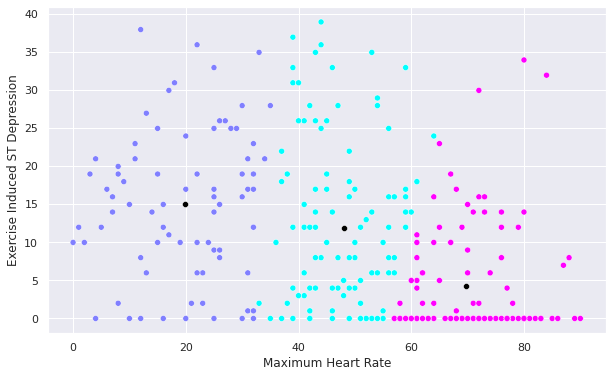

In [ ]:
X = df_new.filter(["Maximum Heart Rate", "Exercise Induced ST Depression"], axis = 1)

#sns.scatterplot(data = X, y="Cholestrol", x= "Age", c = ["blue"])

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1], c= kmeans.labels_, cmap='cool')

sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], c=['black'])

### *Age, Cholestrol and Maximum Heart Rate*

In [ ]:
X = df_new.filter(["Age", "Maximum Heart Rate", "Exercise Induced ST Depression"], axis = 1)

#sns.scatterplot(data = X, y="Cholestrol", x= "Age", c = ["blue"])

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1], c= kmeans.labels_, cmap='cool')

sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], c=['black'])

### *Age, Cholestrol and Resting Blood Pressure*

In [ ]:
X = df_new.filter(["Age", "Cholestrol", "Resting Blood Pressure"], axis = 1)

#sns.scatterplot(data = X, y="Cholestrol", x= "Age", c = ["blue"])

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1], c= kmeans.labels_, cmap='cool')

sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], c=['black'])

### *Age, Cholestrol, and Exercise Induced ST Depression*

In [ ]:
X = df_new.filter(["Age", "Cholestrol", "Exercise Induced ST Depression"], axis = 1)

#sns.scatterplot(data = X, y="Cholestrol", x= "Age", c = ["blue"])

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1], c= kmeans.labels_, cmap='cool')

sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], c=['black'])

### *Age, Maximum Heart Rate and Resting Blood Pressure*

In [ ]:
X = df_new.filter(["Age", "Maximum Heart Rate", "Resting Blood Pressure"], axis = 1)

#sns.scatterplot(data = X, y="Cholestrol", x= "Age", c = ["blue"])

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1], c= kmeans.labels_, cmap='cool')

sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], c=['black'])

### *Age, Resting Blood Pressure and Exercise Induced ST Depression*

In [ ]:
X = df_new.filter(["Age", "Resting Blood Pressure", "Exercise Induced ST Depression"], axis = 1)

#sns.scatterplot(data = X, y="Cholestrol", x= "Age", c = ["blue"])

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1], c= kmeans.labels_, cmap='cool')

sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], c=['black'])

### *Maximum Heart Rate, Resting Blood Pressure, and Exercise Induced ST Depression*

In [ ]:
X = df_new.filter(["Resting Blood Pressure", "Maximum Heart Rate", "Exercise Induced ST Depression"], axis = 1)

#sns.scatterplot(data = X, y="Cholestrol", x= "Age", c = ["blue"])

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1], c= kmeans.labels_, cmap='cool')

sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], c=['black'])

### *Cholestrol, Resting Blood Pressure and Exercise Induced ST Depression*

In [ ]:
X = df_new.filter(["Resting Blood Pressure", "Cholestrol", "Exercise Induced ST Depression"], axis = 1)

#sns.scatterplot(data = X, y="Cholestrol", x= "Age", c = ["blue"])

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1], c= kmeans.labels_, cmap='cool')

sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], c=['black'])

#References

[1] S. H. Bots, S. A. E. Peters, and M. Woodward, “Sex differences in coronary heart disease and stroke mortality: a global assessment of the effect of ageing between 1980 and 2010,” BMJ Global Health, vol. 2, no. 2, 2017.